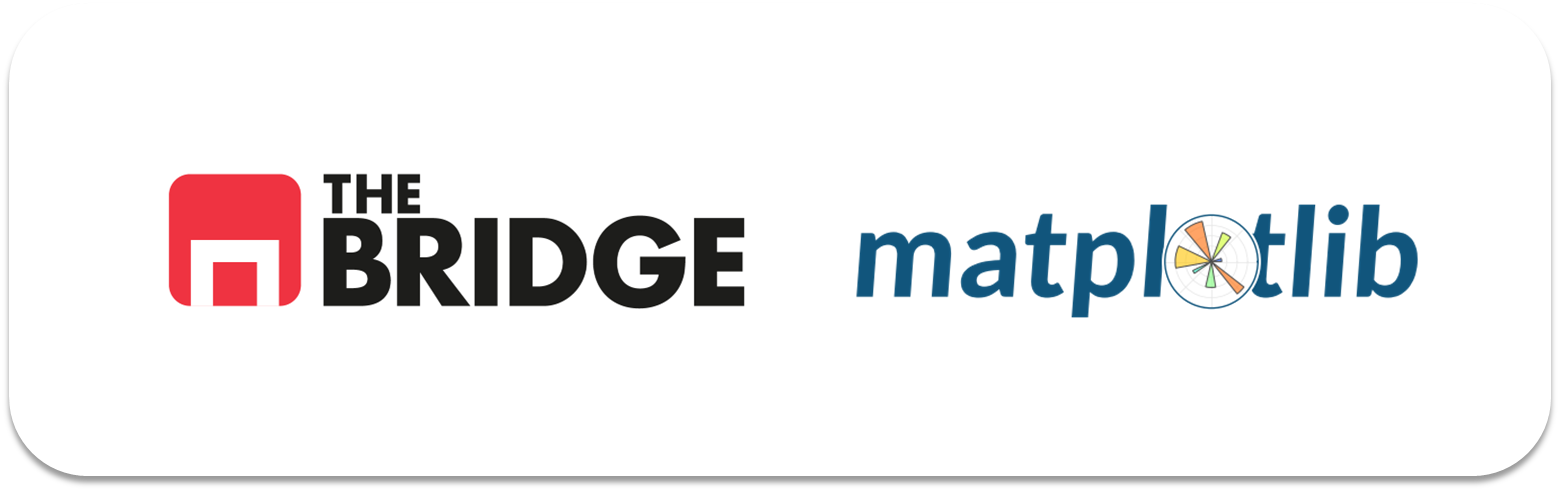

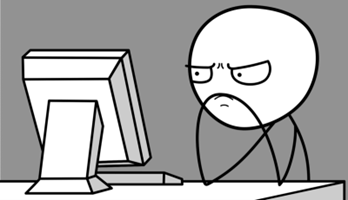

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [3]:
df = pd.read_csv("./data/titanic.csv")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

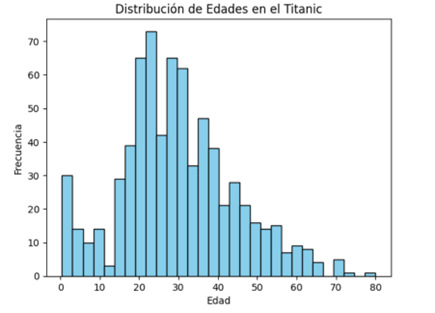

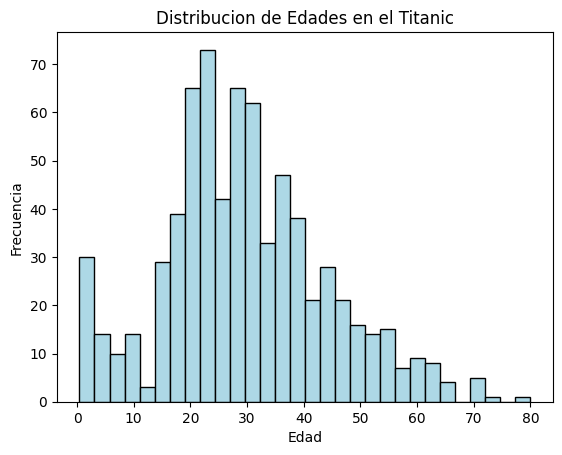

In [15]:

plt.hist(df.age, bins=30, edgecolor="black", color="lightblue")
plt.title("Distribucion de Edades en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Frecuencia");

### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

In [22]:
#plt.hist(df.age, bins=30, edgecolor="black", color="lightblue")
#plt.title("Distribucion de Edades en el Titanic")
#plt.xlabel("Edad")
#plt.ylabel("Frecuencia")
df.age.value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<BarContainer object of 3 artists>

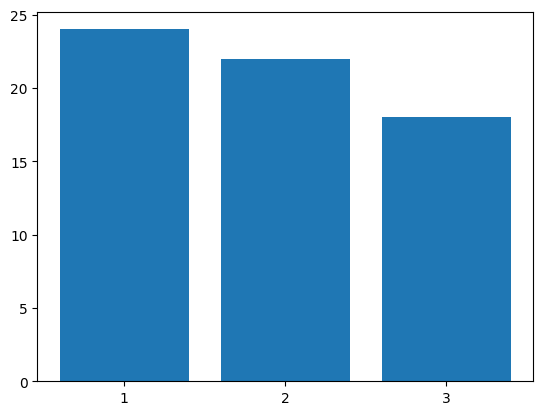

### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

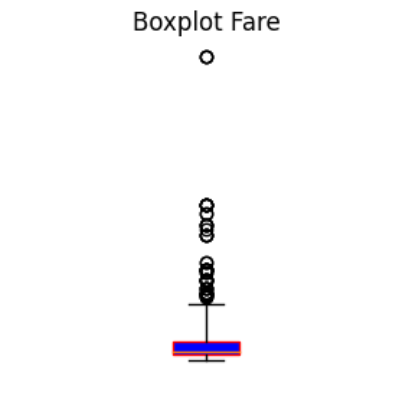

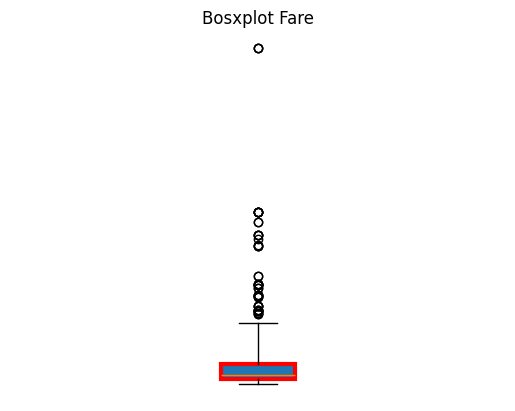

In [114]:
boxprops = dict(linestyle='-', linewidth=3, color='red')
plt.boxplot(df.fare, patch_artist=True, whis=3, boxprops=boxprops)
plt.title("Bosxplot Fare")
plt.axis("off");

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

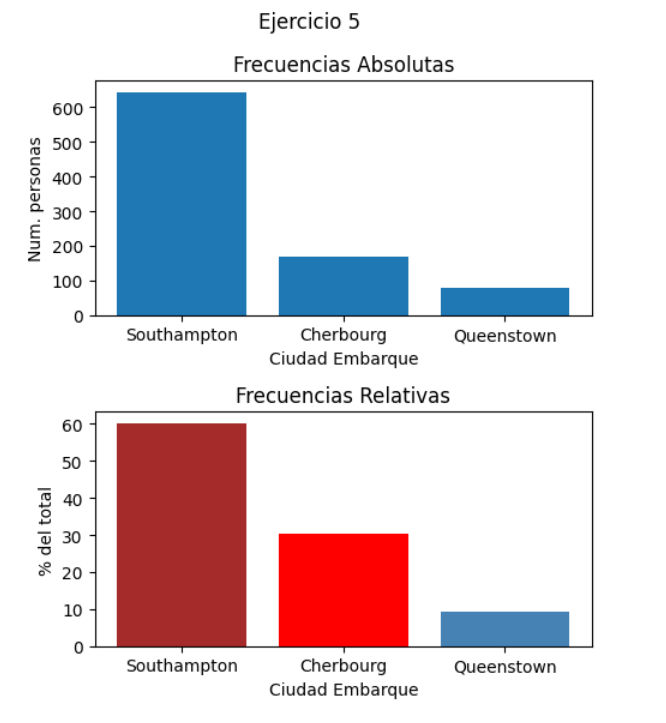

Text(0, 0.5, '% del total')

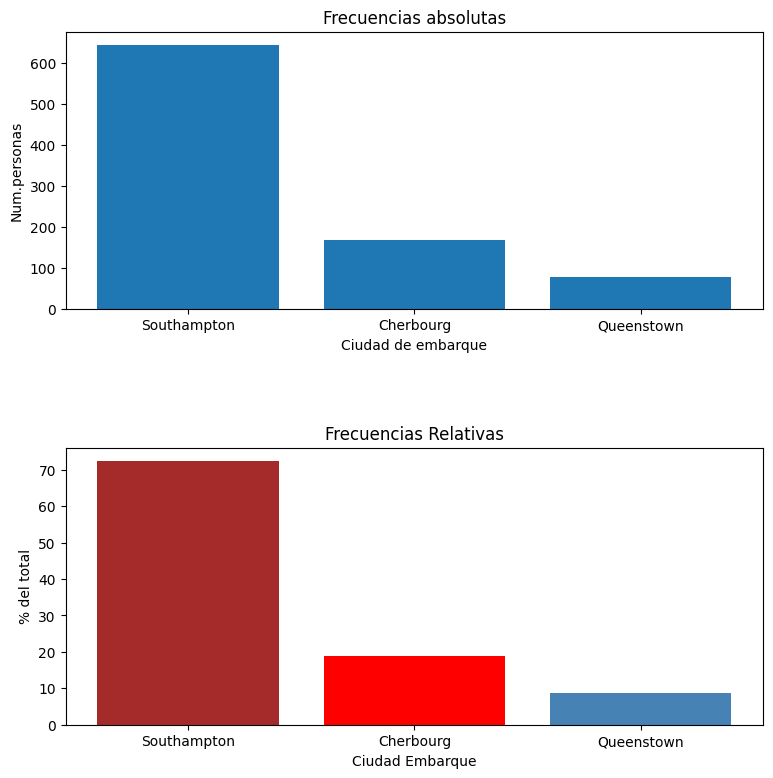

In [74]:
categorias = df.embark_town.value_counts().index.to_list()
frecuencias = df.embark_town.value_counts().to_list()
frec_relativas = (df.embark_town.value_counts(normalize=True)*100).to_list()
fig, ax = plt.subplots(2,1, figsize= (9,9))
fig.subplots_adjust(hspace=0.5)
ax[0].bar(categorias, frecuencias)
ax[0].set_title("Frecuencias absolutas")
ax[0].set_xlabel("Ciudad de embarque")
ax[0].set_ylabel("Num.personas")
ax[1].bar(categorias, frec_relativas, color=["brown", "red", "steelblue"])
ax[1].set_title("Frecuencias Relativas")
ax[1].set_xlabel("Ciudad Embarque")
ax[1].set_ylabel("% del total")


### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

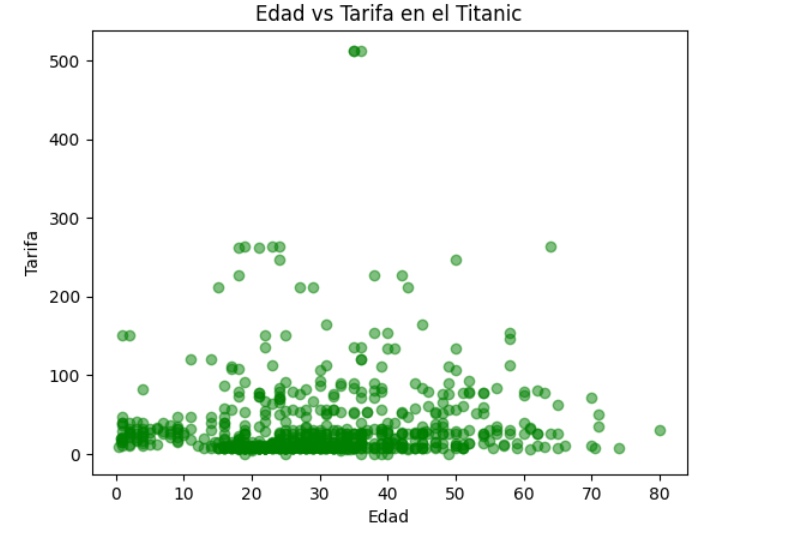

Text(0.5, 1.0, 'Edad vs Tarifa en Titanic')

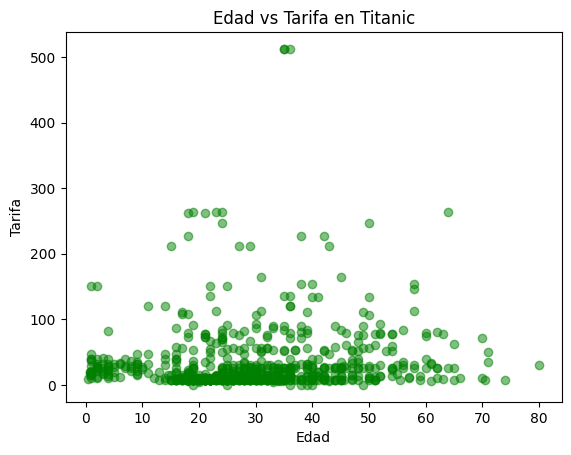

In [79]:
plt.scatter(df.age, df.fare, alpha=0.5, color= "green")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.title("Edad vs Tarifa en Titanic")

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [91]:
precio_medio_edad = df.groupby("age")["fare"].mean()
precio_medio_edad

age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: fare, Length: 88, dtype: float64

In [93]:
desviacion_tarifa_por_edad = df.groupby("age")["fare"].std()
desviacion_tarifa_por_edad

age
0.42           NaN
0.67           NaN
0.75      0.000000
0.83      7.247845
0.92           NaN
           ...    
70.00    42.779960
70.50          NaN
71.00    10.500536
74.00          NaN
80.00          NaN
Name: fare, Length: 88, dtype: float64

### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

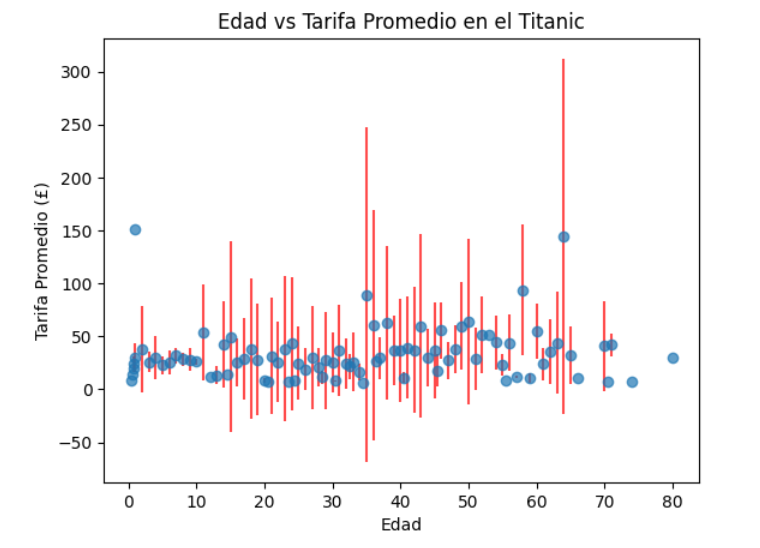

Text(0.5, 1.0, 'Edad vs Tarifa promedio en el Titanic')

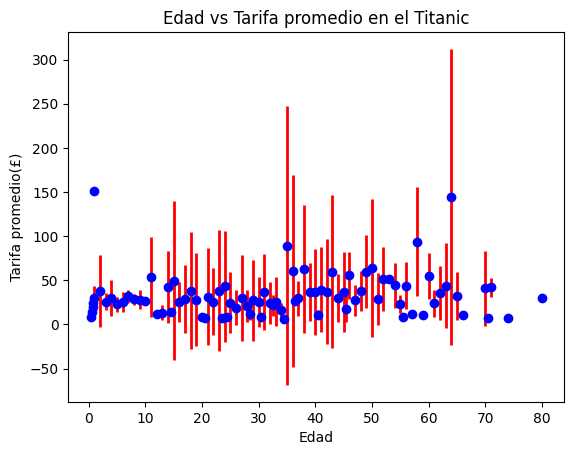

In [108]:
plt.errorbar(precio_medio_edad.index, precio_medio_edad, yerr=desviacion_tarifa_por_edad, fmt="o", color="blue", ecolor="red", elinewidth=2)
plt.xlabel("Edad")
plt.ylabel("Tarifa promedio(£)")
plt.title("Edad vs Tarifa promedio en el Titanic")

EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

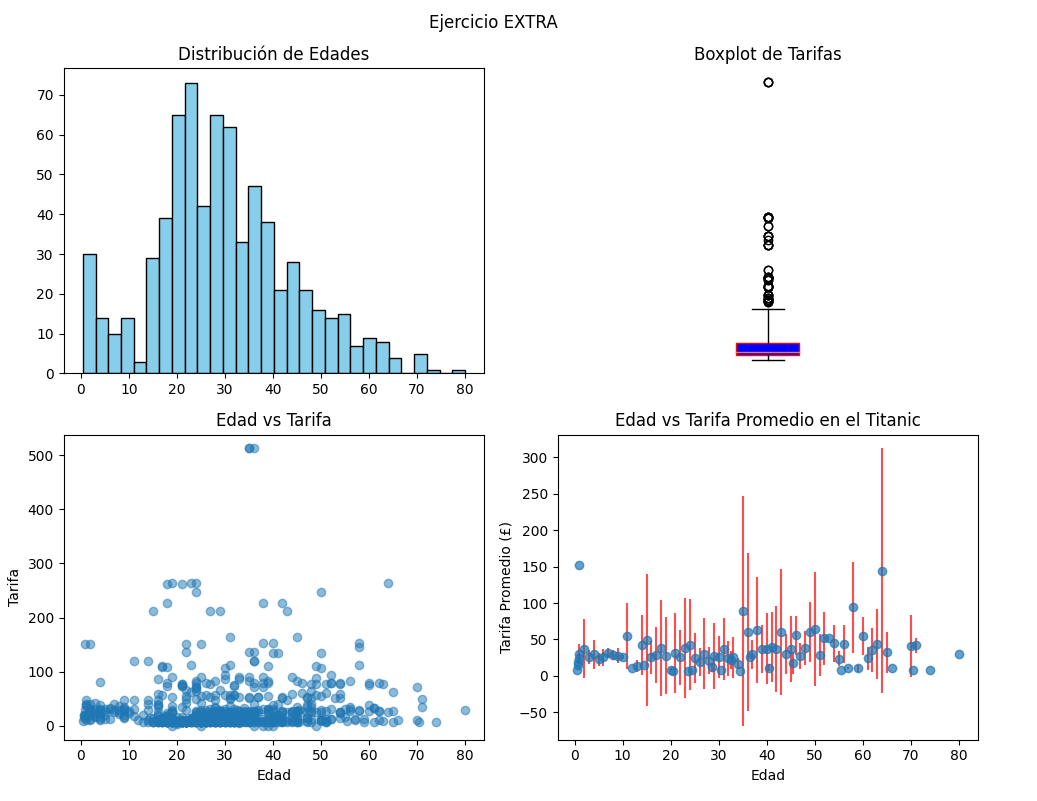

Text(0.5, 1.0, 'Edad vs Tarifa promedio en el Titanic')

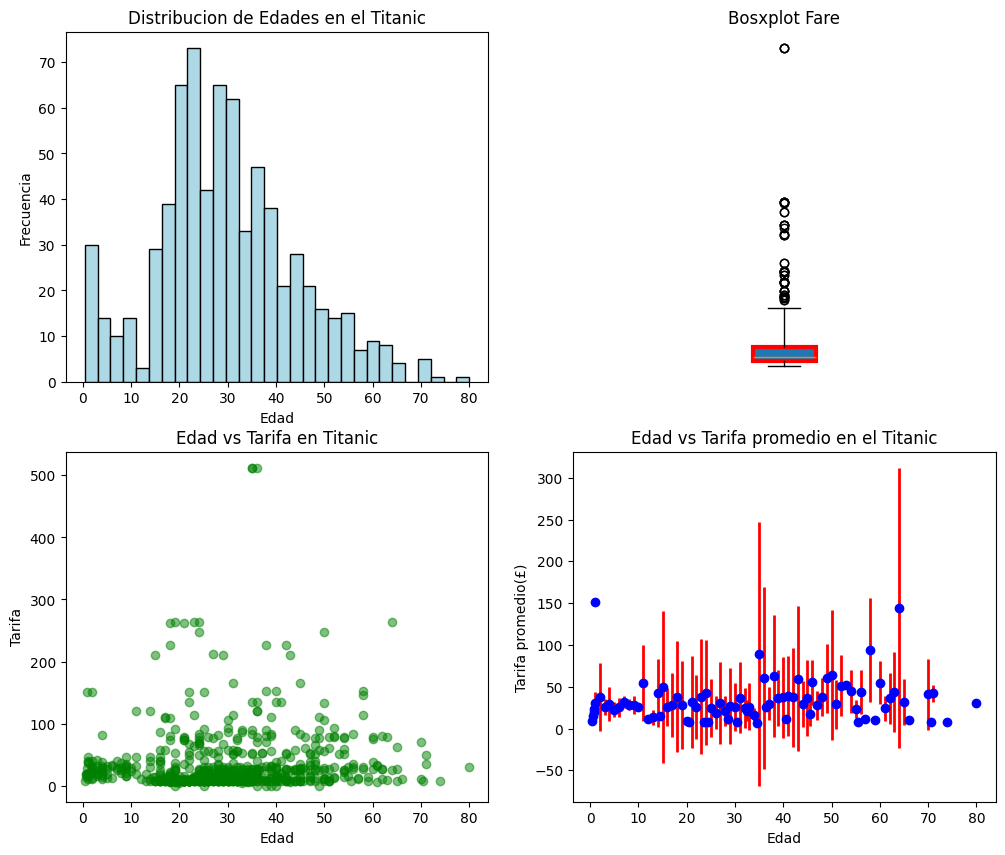

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,10) )
ax[0,0].hist(df.age, bins=30, edgecolor="black", color="lightblue")
ax[0,0].set_title("Distribucion de Edades en el Titanic")
ax[0,0].set_xlabel("Edad")
ax[0,0].set_ylabel("Frecuencia")
boxprops = dict(linestyle='-', linewidth=3, color='red')
ax[0,1].boxplot(df.fare, patch_artist=True, whis=3, boxprops=boxprops)
ax[0,1].set_title("Bosxplot Fare")
ax[0,1].axis("off")
ax[1,0].scatter(df.age, df.fare, alpha=0.5, color= "green")
ax[1,0].set_xlabel("Edad")
ax[1,0].set_ylabel("Tarifa")
ax[1,0].set_title("Edad vs Tarifa en Titanic")
ax[1,1].errorbar(precio_medio_edad.index, precio_medio_edad, yerr=desviacion_tarifa_por_edad, fmt="o", color="blue", ecolor="red", elinewidth=2)
ax[1,1].set_xlabel("Edad")
ax[1,1].set_ylabel("Tarifa promedio(£)")
ax[1,1].set_title("Edad vs Tarifa promedio en el Titanic")

